In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os
import numpy as np

In [2]:
s = os.environ['share_str']
e = create_engine(s)

In [53]:
q = """
with first_txn as (
select t.client_id,
       t.receipt_no,
       t.amount,
       convert_timezone('UTC', 'America/Mexico_City', t.created_at) created_at,
       first_value(created_at) over (partition by t.client_id order by created_at asc rows between unbounded preceding and unbounded following) first_txn_date,
       first_value(t.receipt_no) over (partition by t.client_id order by created_at asc rows between unbounded preceding and unbounded following) first_txn_id
from star.transactions t
left join star.transaction_detail td
on t.receipt_no = td.receipt_no
where td.status_code = 1),

act_2019 as (
select client_id,
       date_trunc('month', created_at) month,
       case when sum(amount) > 0 then 1 else 0 end active
from first_txn
where first_txn_date >= convert_timezone('America/Mexico_City', 'UTC', '2017-04-01 00:00:00')
group by 1, 2
)
select *
from act_2019 a
"""

In [54]:
df = pd.read_sql(q, e)
df.head()

,client_id,month,active
0,7b54db8e90bd14e57edccf02d4888214ccfac43a79af75...,2018-07-01,1
1,458e6534be5687e97bc33e976bdd1133a37dac025fbe47...,2018-06-01,1
2,5c1df7f5d790995ff0c120eb49fc892e19526096662769...,2018-08-01,1
3,86e2a4f16482f1b5609751e26feb688e8098cd02252a3b...,2018-04-01,1
4,adf434d2f40f9164793cfe9861151873f1244bdec7eed3...,2017-10-01,1


In [55]:
wide = df.pivot(columns = 'month', index = 'client_id', values = 'active')
wide.head()

month,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,...,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00
client_id,,,,,,,,,,,,,,,,,,,,,
00006e4518dfeebd7c5d8c9e00b91236963b6fd99a1f116c97d2e966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
0000975b6116cb93926f2a626150acd666afc72d6b0c062fdd3537eb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
0000bfe882fa23fd4d4c459ffe7cc6b9eaf9202279f3b101564e1d31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
0000e8c1b1483bb95b4796f31bcadb39e5924d04592a9cd33d0a4346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
000128324cadaea3a40de1dc72ffef66930f2703526388dd8948e1cd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0


In [56]:
wide['active_months'] = wide.sum(axis = 1)
wide.head()

month,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,...,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,active_months
client_id,,,,,,,,,,,,,,,,,,,,,
00006e4518dfeebd7c5d8c9e00b91236963b6fd99a1f116c97d2e966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.0
0000975b6116cb93926f2a626150acd666afc72d6b0c062fdd3537eb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
0000bfe882fa23fd4d4c459ffe7cc6b9eaf9202279f3b101564e1d31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,3.0
0000e8c1b1483bb95b4796f31bcadb39e5924d04592a9cd33d0a4346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
000128324cadaea3a40de1dc72ffef66930f2703526388dd8948e1cd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0


In [57]:
import missingno as mp

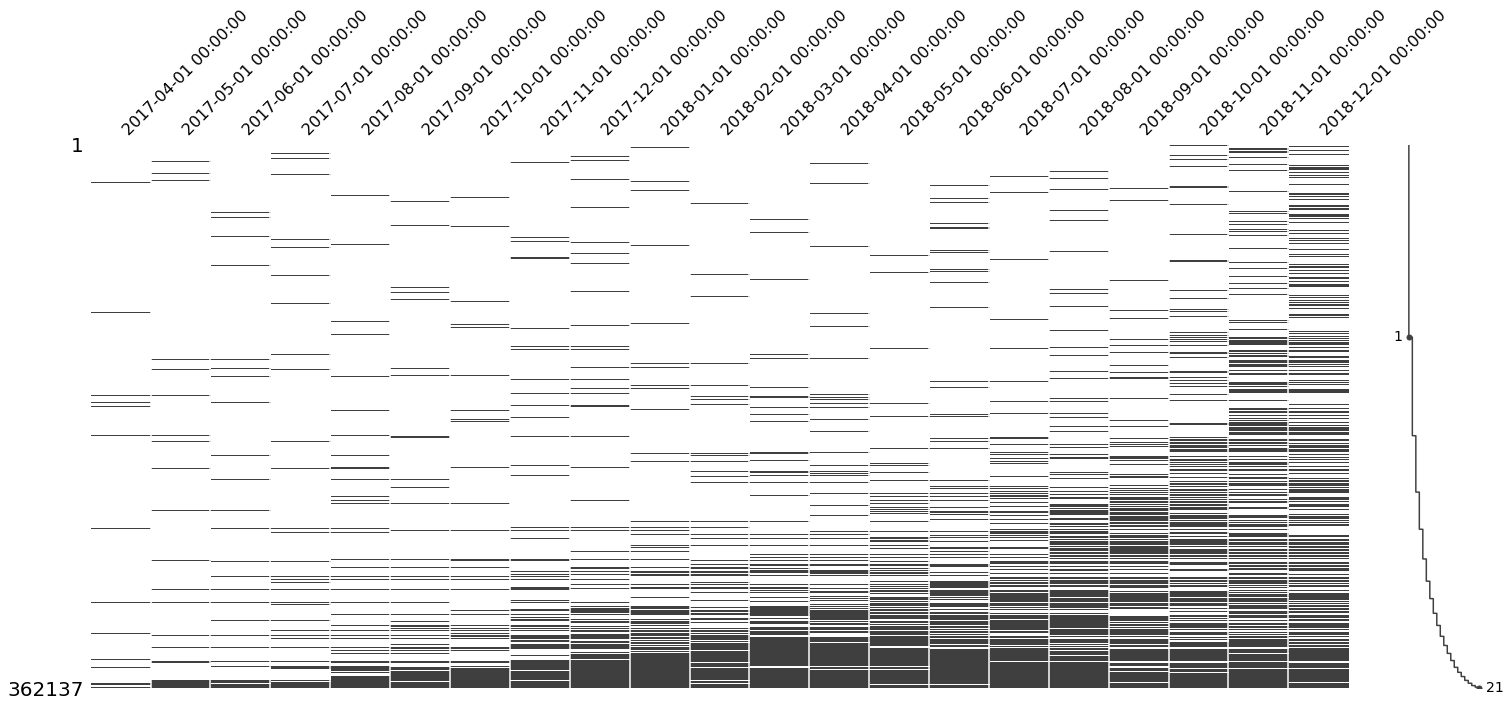

In [58]:
mp.matrix(wide.sort_values(by = 'active_months', ascending = True).drop('active_months', axis = 1))

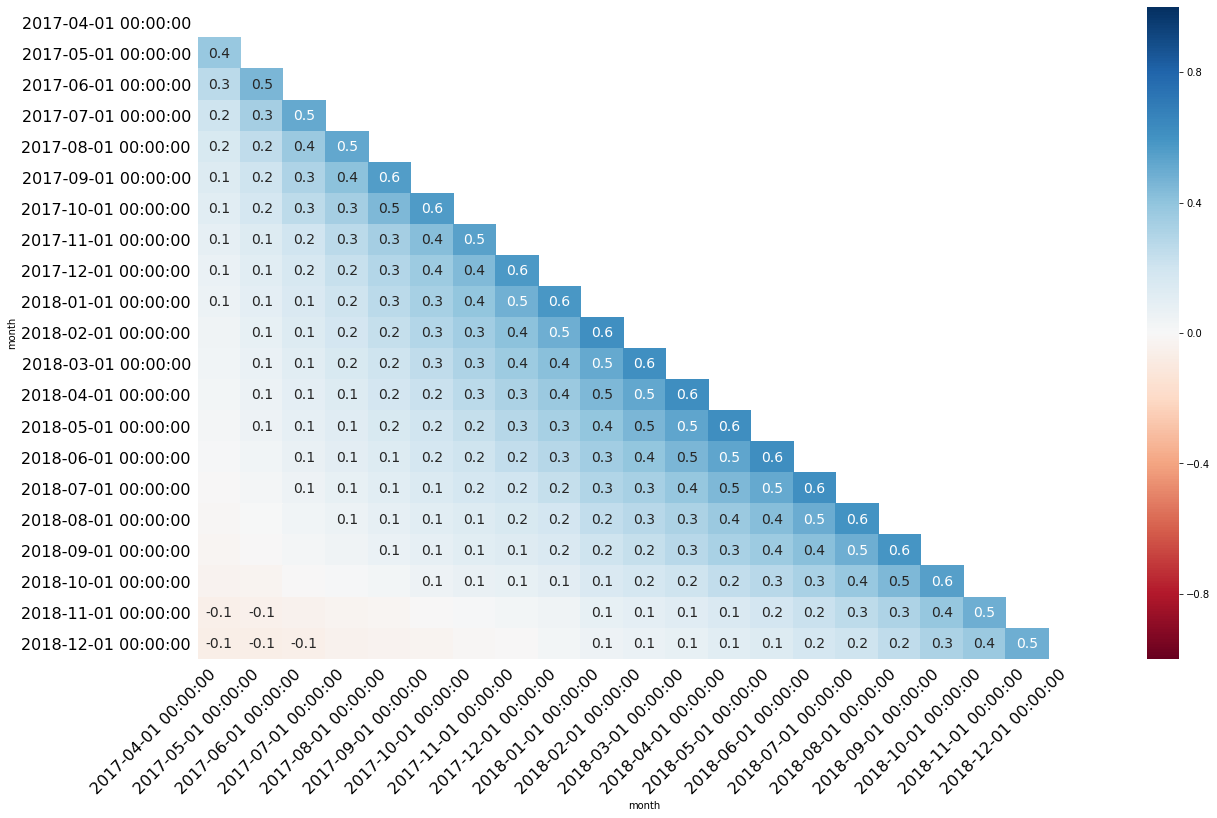

In [59]:
mp.heatmap(wide.sort_values(by = 'active_months', ascending = True).drop('active_months', axis = 1))

# Calculate time difference between registration and activation

In [60]:
q2 = """
select client_id, 
       datediff('day', onboarding_date, created_at) activation_lag
from (
select t.client_id,
       convert_timezone('UTC', 'America/Mexico_City', t.created_at) created_at,
       row_number() over (partition by t.client_id order by t.created_at asc) rn,
       onboarding_date
from star.transactions t
left join star.transaction_detail td
on t.receipt_no = td.receipt_no
left join star.merchant_detail md
on md.client_id = t.client_id
where status_code = 1)
where rn = 1
"""

In [61]:
df2 = pd.read_sql(q2, e)
df2.head()

,client_id,activation_lag
0,636249e7944b20241fd874d2f7b46f02ccd665761cd8b3...,208
1,11a012d8534fa97b5daf6c1045254520d61eb30c494bdb...,58
2,4dcc5959b0bf3d90076d5f9e090e65dbae0ce268a6e1ab...,0
3,cc9e9ab08602ff169b4fd644d10c040d60ef57aebcb672...,0
4,19ace15eaf845181a46db7a986039fbea03275b81df353...,-1


In [62]:
wide2 = wide.join(df2.set_index('client_id'), on = 'client_id', how = 'left')

In [63]:
wide2.head()

,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,...,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,active_months,activation_lag
client_id,,,,,,,,,,,,,,,,,,,,,
00006e4518dfeebd7c5d8c9e00b91236963b6fd99a1f116c97d2e966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.0,9
0000975b6116cb93926f2a626150acd666afc72d6b0c062fdd3537eb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,-1
0000bfe882fa23fd4d4c459ffe7cc6b9eaf9202279f3b101564e1d31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,3.0,1077
0000e8c1b1483bb95b4796f31bcadb39e5924d04592a9cd33d0a4346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,3
000128324cadaea3a40de1dc72ffef66930f2703526388dd8948e1cd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,-1


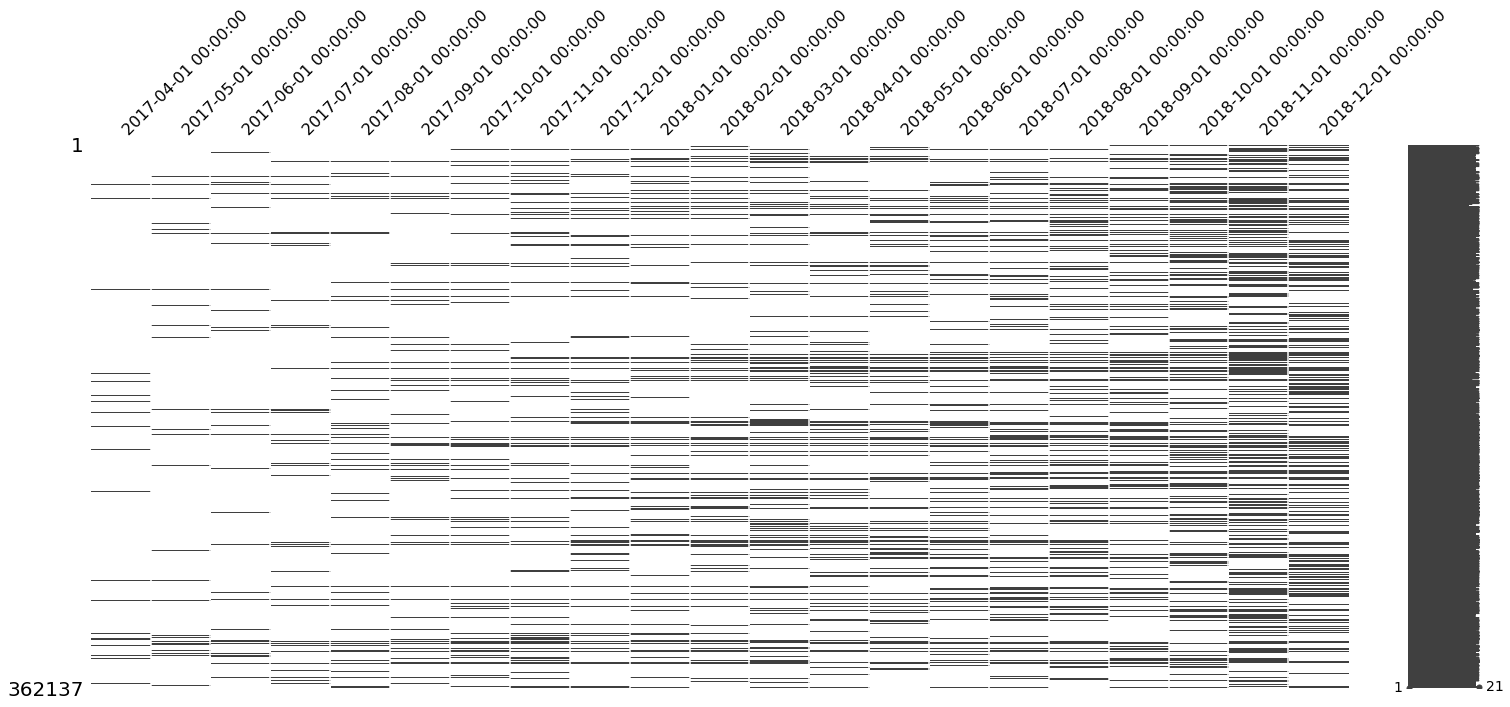

In [64]:
mp.matrix(wide2.sort_values(by = 'activation_lag', ascending = True).drop(['active_months', 'activation_lag'], axis = 1))

no patterns seem to arise

# boxplot for inactivity periods

Plot boxplot for average and median inactivity period lengths. Are there a lot of outliers?

In [65]:
q = """select client_id, 
       industry,
       avg(inactivity) average,
       median(inactivity) median
from (
select t.client_id, 
       t.receipt_no, 
       t.created_at,
       last_value(created_at) over (partition by t.client_id order by t.created_at desc rows between current row and 1 following) previous_txn,
       datediff('day', previous_txn, created_at) inactivity,
       industry
from star.transactions t
left join star.transaction_detail td
on t.receipt_no = td.receipt_no
left join star.merchant_detail md
on t.client_id = md.client_id
where status_code = 1
order by 1, 2 asc)
group by 1, 2"""

In [66]:
df3 = pd.read_sql(q, e)
df3.head()

,client_id,industry,average,median
0,b1a3673f466094b876ea2776c38b403c57190391fe3a50...,Belleza y cuidado personal,2.333333,0.0
1,3653e51a45f501ceb19a57177c483e91d98b11cc5882f0...,Servicios profesionales,7.500000,7.5
2,d6bb34c2f2de2c99e2c88754e50e3f162a16a325ccd057...,Ropa y accesorios,0.000000,0.0
3,60d16ff9b8b3fe17f4ec83e78db7510c954717f1aee1b6...,Alimentos y bebidas,0.127517,0.0
4,59c0a2c644091c261ad4da50ee4de3ef63554cd67a3c19...,Alimentos y bebidas,5.888889,0.0


In [67]:
import seaborn as sns

(-5, 50)

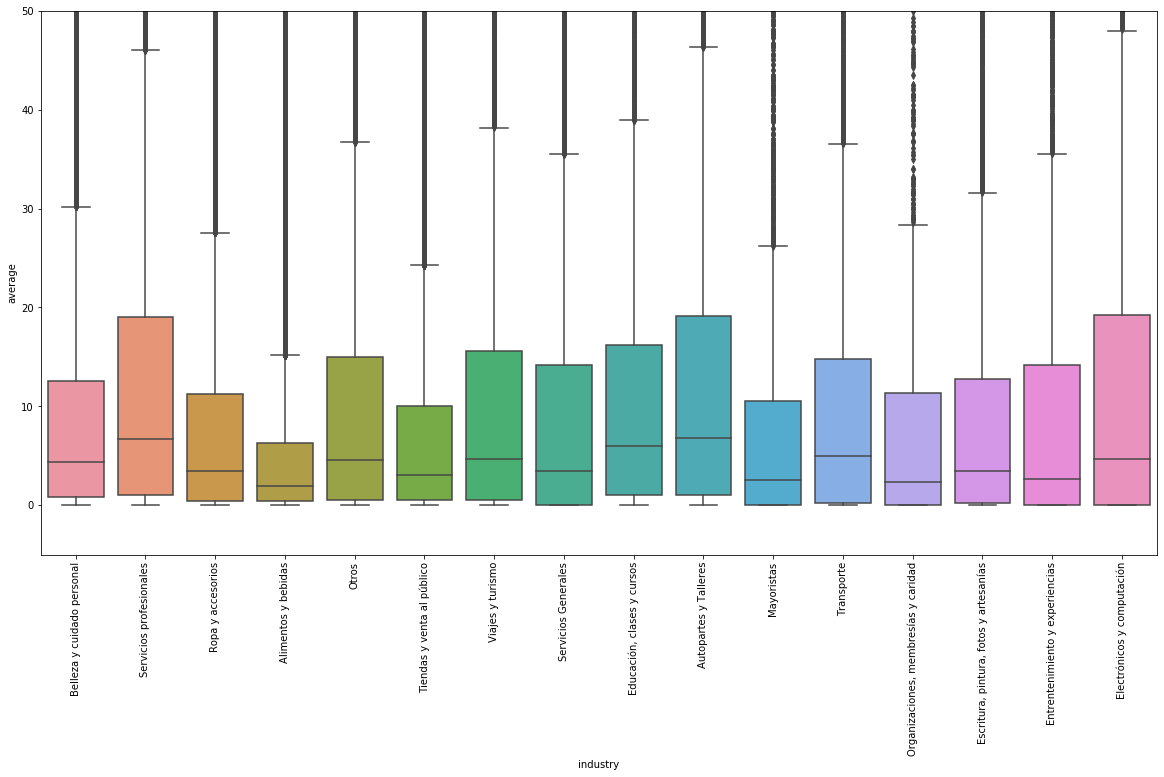

In [68]:
plt.figure(figsize = (20, 10))
p = sns.boxplot(x = 'industry', y = 'average', data = df3)

p.axes.set_xticklabels(p.get_xticklabels(), rotation = 90);
p.axes.set_ylim(-5, 50)

(-10, 35)

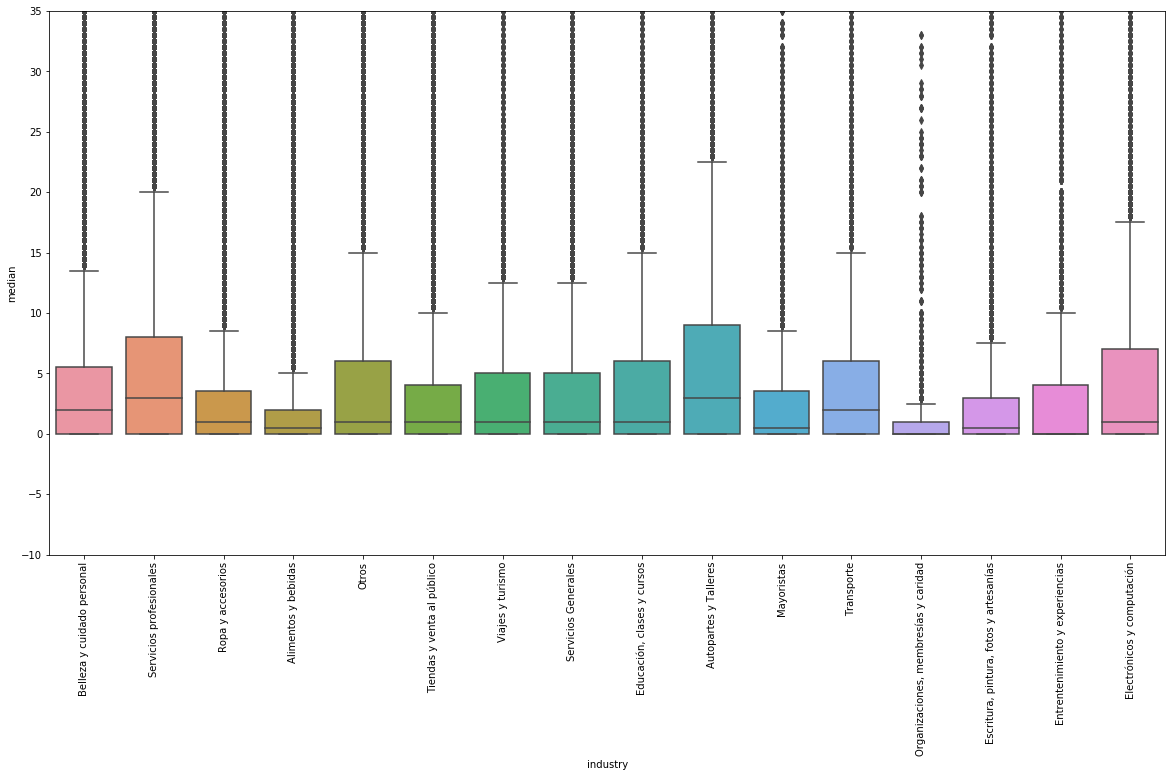

In [69]:
plt.figure(figsize = (20, 10))
p = sns.boxplot(x = 'industry', y = 'median', data = df3)

p.axes.set_xticklabels(p.get_xticklabels(), rotation = 90);
p.axes.set_ylim(-10, 35)

Let's define a gone merchant as one that has left for at least three months. Consider merchants who activated after jan 2018 and didn't transact since 01 oct 2018

In [85]:
q3 = """
with total as (
select t.client_id, 
       t.receipt_no,
       convert_timezone('UTC', 'America/Mexico_City', created_at) date,
       first_value(date) over (partition by t.client_id order by created_at asc rows between unbounded preceding and unbounded following) first_txn,
       last_value(date) over (partition by t.client_id order by created_at asc rows between unbounded preceding and unbounded following) last_txn,
       amount, 
       case when last_txn >= '2018-10-01 00:00:00' then 'acvtive' else 'inactive' end status,
       fees_charged
from star.transactions t
left join star.transaction_detail td
on t.receipt_no = td.receipt_no
where status_code = 1)

select *
from total
where first_txn >= '2018-01-01 00:00:00'
order by random()
limit 3000000
"""

In [86]:
df3 = pd.read_sql(q3, e)

In [87]:
df3.head()

,client_id,receipt_no,date,first_txn,last_txn,amount,status,fees_charged
0,e81b4a7ccd16c5c55a8089e8819ca185f0313b7eca068d...,ba023f1e15e257495dbf3d2b4226ffcd526480209dbea2...,2018-09-21 16:37:53,2018-06-10 19:23:47,2018-12-15 09:40:38,302.0,acvtive,10.87
1,e220af417b667c702bba01a7ca7df074f29d11574f9d9e...,aeb7734e18af361ece90f0b2a20fb9a08a1f117bfff1c2...,2018-11-30 10:41:11,2018-09-19 12:28:41,2018-12-30 12:20:52,500.0,acvtive,18.00
2,0e481372f79524a7e28a5c3df27b614a62e3780674e3ff...,331c496ed7d961a52a4619df8716f62328163c5f1bc6e5...,2018-12-13 03:32:27,2018-07-03 18:07:27,2018-12-30 06:09:01,15.0,acvtive,0.54
3,e84143a91afaefb145b1007ed6795ee3487543c505c054...,beec60fe229021762afb3514afb224cd31ef02d659ef6f...,2018-11-26 02:18:12,2018-02-11 18:57:37,2018-12-30 09:28:37,30.0,acvtive,1.08
4,6c4552734f34d4e9abb853b4453711f2191da57dcb9c7c...,64c2fd9318b1c6ad2f3522591737c668a03aff5686a209...,2018-12-23 08:29:04,2018-05-03 09:13:56,2018-12-28 07:06:51,300.0,acvtive,10.80


In [91]:
df3.status.unique()

array(['acvtive', 'inactive'], dtype=object)

In [95]:
df3[df3.status == 'acvtive'].head()

,client_id,receipt_no,date,first_txn,last_txn,amount,status,fees_charged
0,e81b4a7ccd16c5c55a8089e8819ca185f0313b7eca068d...,ba023f1e15e257495dbf3d2b4226ffcd526480209dbea2...,2018-09-21 16:37:53,2018-06-10 19:23:47,2018-12-15 09:40:38,302.0,acvtive,10.87
1,e220af417b667c702bba01a7ca7df074f29d11574f9d9e...,aeb7734e18af361ece90f0b2a20fb9a08a1f117bfff1c2...,2018-11-30 10:41:11,2018-09-19 12:28:41,2018-12-30 12:20:52,500.0,acvtive,18.00
2,0e481372f79524a7e28a5c3df27b614a62e3780674e3ff...,331c496ed7d961a52a4619df8716f62328163c5f1bc6e5...,2018-12-13 03:32:27,2018-07-03 18:07:27,2018-12-30 06:09:01,15.0,acvtive,0.54
3,e84143a91afaefb145b1007ed6795ee3487543c505c054...,beec60fe229021762afb3514afb224cd31ef02d659ef6f...,2018-11-26 02:18:12,2018-02-11 18:57:37,2018-12-30 09:28:37,30.0,acvtive,1.08
4,6c4552734f34d4e9abb853b4453711f2191da57dcb9c7c...,64c2fd9318b1c6ad2f3522591737c668a03aff5686a209...,2018-12-23 08:29:04,2018-05-03 09:13:56,2018-12-28 07:06:51,300.0,acvtive,10.80


# Might there be any difference between amounts charged to people who left?

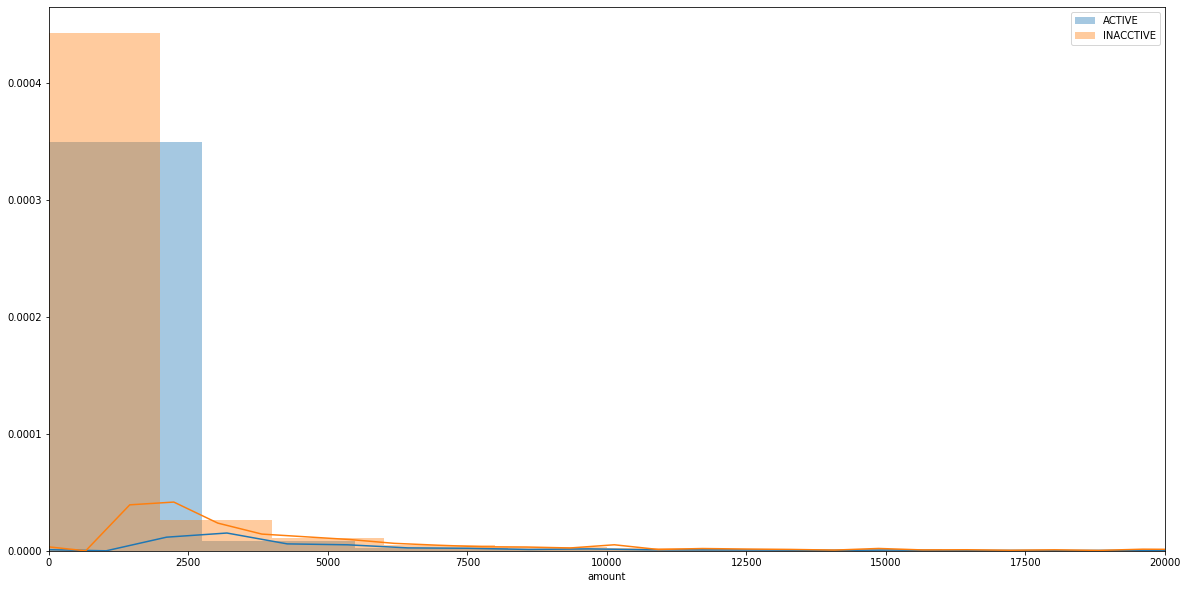

In [98]:
plt.figure(figsize = (20, 10))

sns.distplot(df3.amount[df3.status == 'acvtive'], label = 'ACTIVE')
p = sns.distplot(df3.amount[df3.status == 'inactive'], label = 'INACCTIVE')

p.axes.set_xlim(0, 20000)
plt.legend()

amounts for active/inactive users do not seem to be different enough

In [101]:
df3['fee'] = df3.fees_charged/df3.amount

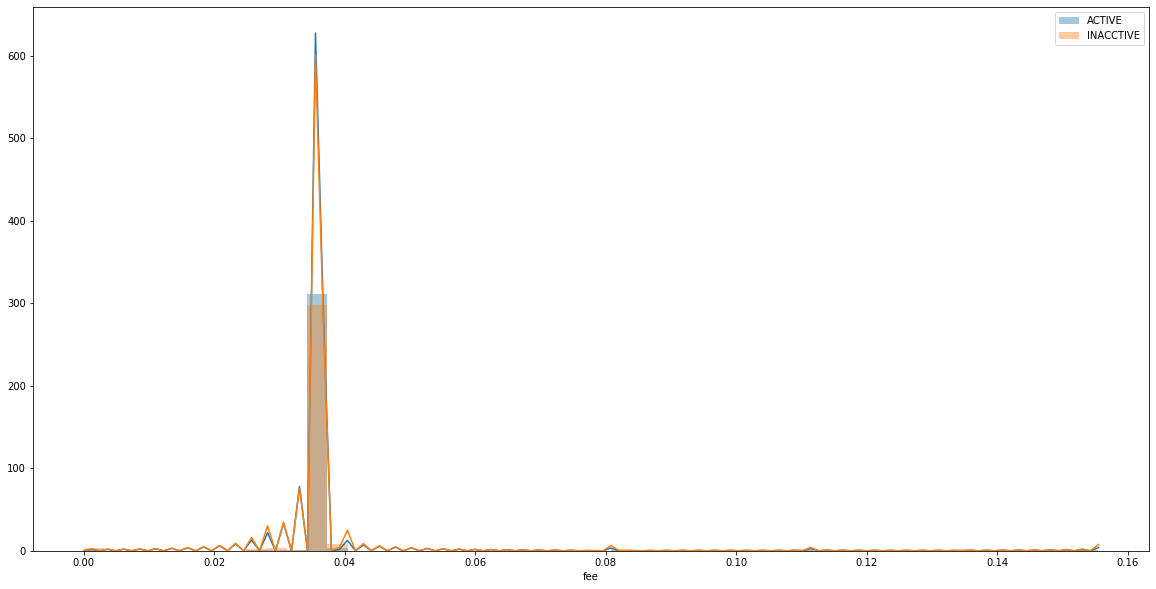

In [103]:
plt.figure(figsize = (20, 10))

sns.distplot(df3.fee[df3.status == 'acvtive'], label = 'ACTIVE')
p = sns.distplot(df3.fee[df3.status == 'inactive'], label = 'INACCTIVE')

#p.axes.set_xlim(0, 20000)
plt.legend()

same for charged fees

Is there any state, industry or reader type for which people leave us more?

In [108]:
q4 = """
with total as (
select t.client_id, 
       t.receipt_no,
       convert_timezone('UTC', 'America/Mexico_City', created_at) date,
       first_value(date) over (partition by t.client_id order by created_at asc rows between unbounded preceding and unbounded following) first_txn,
       last_value(date) over (partition by t.client_id order by created_at asc rows between unbounded preceding and unbounded following) last_txn,
       case when last_txn >= '2018-10-01 00:00:00' then 'acvtive' else 'inactive' end status,
       industry,
       onboarding_state
from star.transactions t
left join star.transaction_detail td
on t.receipt_no = td.receipt_no
left join star.merchant_detail md
on md.client_id = t.client_id
where status_code = 1),

industry as (
select industry, 
       status,
       count(distinct client_id) n,
       'industry' var
from total
where first_txn >= '2018-01-01 00:00:00'
group by 1, 2),

state as (
select onboarding_state,
       status,
       count(distinct client_id) n,
       'state' var
from total
where first_txn >= '2018-01-01 00:00:00'
group by 1, 2)

select * from industry
union all
select * from state
"""

In [109]:
df4 = pd.read_sql(q4, e)
df4.head()

,industry,status,n,var
0,Mayoristas,acvtive,1704,industry
1,Autopartes y Talleres,acvtive,4476,industry
2,Transporte,inactive,1743,industry
3,Nuevo León,acvtive,8765,state
4,Chihuahua,acvtive,4847,state


In [116]:
df4['var'].unique()

array(['industry', 'state'], dtype=object)

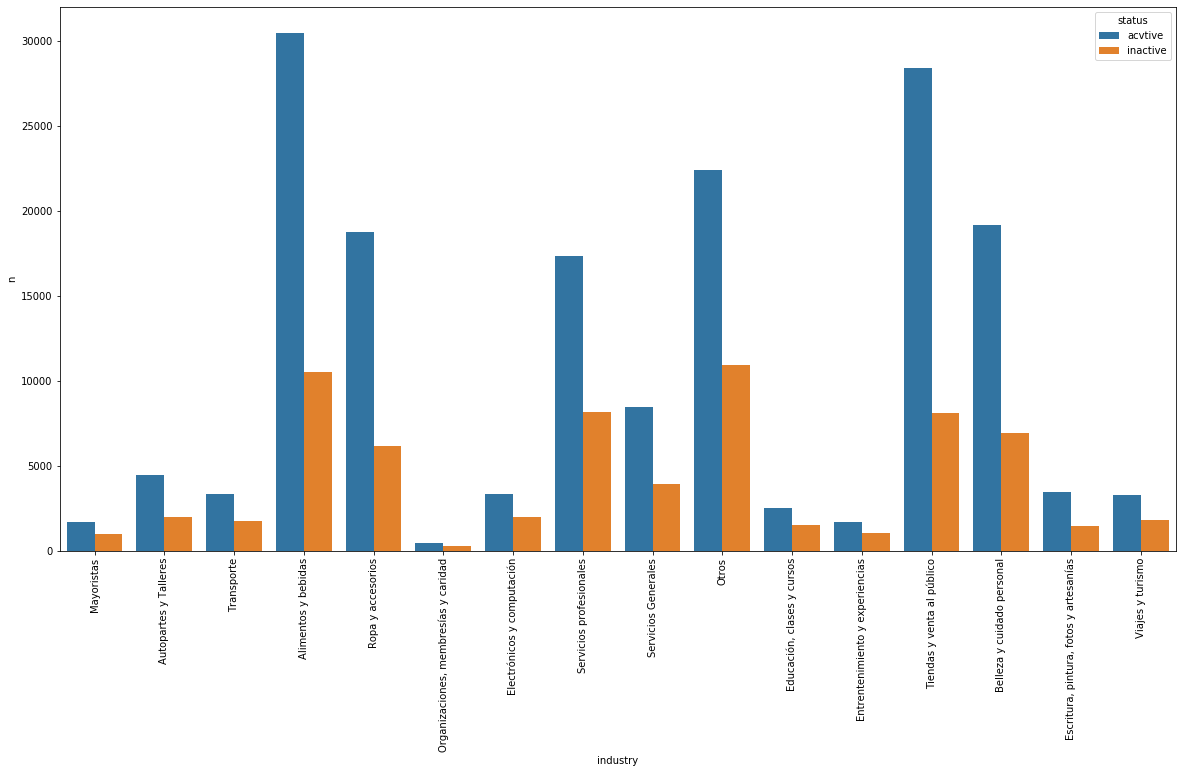

In [128]:
plt.figure(figsize = (20, 10)) 
p = sns.barplot(x = 'industry', y = 'n', data = df4[(df4['var'] == 'industry')], hue = 'status')


p.axes.set_xticklabels(p.get_xticklabels(), rotation = 90);

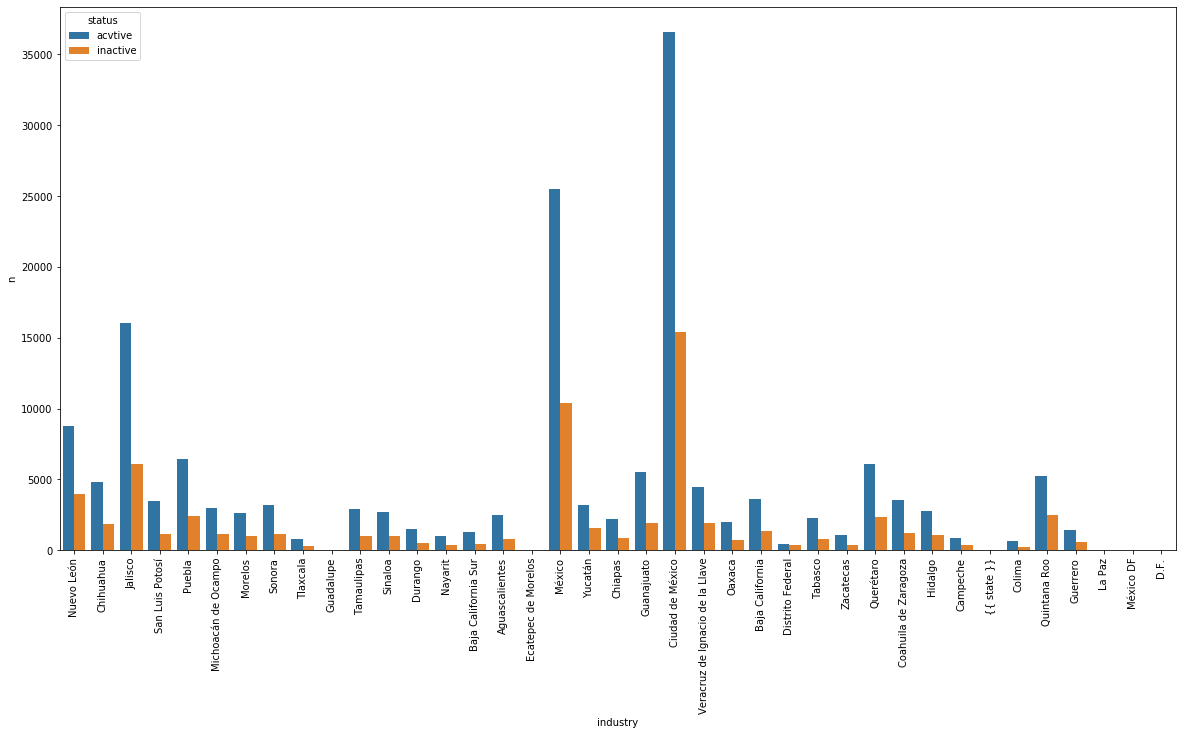

In [129]:
plt.figure(figsize = (20, 10)) 
p = sns.barplot(x = 'industry', y = 'n', data = df4[(df4['var'] == 'state')], hue = 'status')


p.axes.set_xticklabels(p.get_xticklabels(), rotation = 90);